# Microbiome data normalization tutorial
This is a jupyter notebook example of the different ways to normalize the reads (i.e. TSS, rarefaction, compositionality correction, etc).

## Setup

In [1]:
import calour as ca
ca.set_log_level(11)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Load the data
we use the chronic fatigue syndrome data from:

Giloteaux, L., Goodrich, J.K., Walters, W.A., Levine, S.M., Ley, R.E. and Hanson, M.R., 2016.

Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome.

Microbiome, 4(1), p.30.

### Standard load with TSS normalization
for each sample we normalize to 10000 reads/sample.

This is done by dividing the number of reads of each feature in a sample by the total sum of reads  (of all features) in the sample, and then multiplying by the desired number of reads (i.e. 10000).

After this normalization, the sum of (normalized) reads in each sample will be 10000.

This is different from rarefaction, since each feature can have a non-integer number of reads, and less information is thrown away. However, you need to be careful not to have a bias by the original number of reads (mostly in binary methods). dsFDR works fine with this normalization.

Note that we also throw away samples with less than min_reads=1000 reads total (before normalization). This is in order to reduce the discretization effect in samples with low number of reads.

In [2]:
cfs_normalized=ca.read_amplicon('data/chronic-fatigue-syndrome.biom',
                     'data/chronic-fatigue-syndrome.sample.txt',
                     normalize=10000,min_reads=1000)

2020-09-11 20:13:18 INFO loaded 87 samples, 2129 features
2020-09-11 20:13:18 WARNING These have metadata but do not have data - dropped (1): {'ERR1331814'}
2020-09-11 20:13:18 WARNING Do you forget to normalize your data? It is required before running this function
2020-09-11 20:13:18 INFO After filtering, 87 remain.


In [3]:
print(cfs_normalized)

AmpliconExperiment with 87 samples, 2129 features


The sum of reads per sample should be 10000

In [4]:
cfs_normalized.get_data(sparse=False).sum(axis=1)

array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000.])

The original number of reads per sample (before normalization) is stored in the sample_metadata table in the field "_calour_original_abundance"

<IPython.core.display.Javascript object>


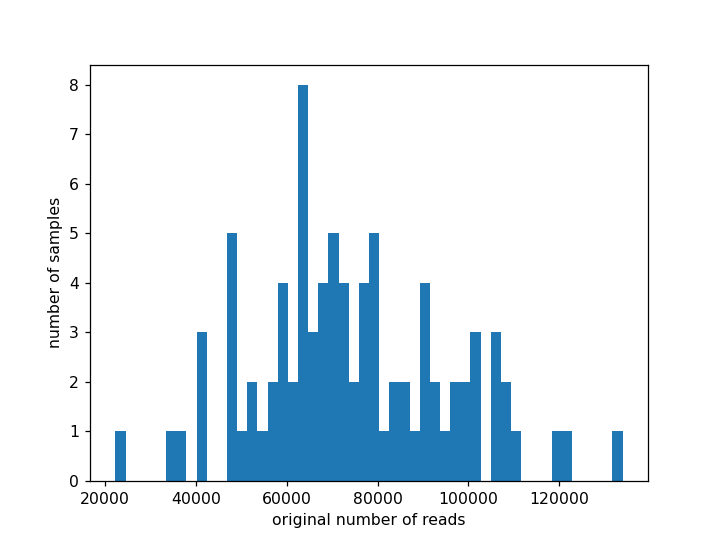

Text(0, 0.5, 'number of samples')

In [5]:
res=plt.hist(cfs_normalized.sample_metadata['_calour_original_abundance'],50)
plt.xlabel('original number of reads')
plt.ylabel('number of samples')

### load with no normalization
we can load the data without normalizing the reads per sample by setting the parameter `normalize=None`

This is not recommended for typical microbiome experiments since the number of reads per sample is arbitrary and does not reflect the number of bacteria in the sample.

We still chose to remove all samples with less than 1000 reads total.

In [6]:
cfs_not_normalized=ca.read_amplicon('data/chronic-fatigue-syndrome.biom',
                                    'data/chronic-fatigue-syndrome.sample.txt',
                                     normalize=None,min_reads=1000)

2020-09-11 20:13:22 INFO loaded 87 samples, 2129 features
2020-09-11 20:13:22 WARNING These have metadata but do not have data - dropped (1): {'ERR1331814'}
2020-09-11 20:13:22 WARNING Do you forget to normalize your data? It is required before running this function
2020-09-11 20:13:22 INFO After filtering, 87 remain.


In [7]:
cfs_not_normalized.get_data(sparse=False).sum(axis=1)

array([ 62629.,  96404., 105470.,  50560.,  66414.,  97011.,  77673.,
        59655., 100206.,  34044.,  74744., 106959.,  75014.,  64515.,
        52549.,  54079.,  41310.,  66931.,  69574.,  70387.,  93480.,
        84020.,  40701.,  61849., 119409.,  51815.,  59722.,  47760.,
       101434.,  85726.,  72033.,  71608.,  36721., 121576.,  62482.,
        68390.,  70886.,  76899.,  47124., 102348., 101551.,  61425.,
        68260.,  79580.,  60183.,  78305., 107605., 134027.,  81385.,
        79597.,  64939.,  56027.,  64103.,  90476.,  70982., 105850.,
        90525.,  92925.,  22203.,  63500.,  64368.,  73568.,  69072.,
        89176.,  64426.,  59181., 100251.,  76190.,  84987.,  68514.,
        84449.,  80196.,  48256.,  47898.,  55874., 107258., 110218.,
        63968.,  94907.,  49032.,  77150.,  89870.,  71017.,  41598.,
        89919.,  72977.,  80308.])

## TSS normalization (`normalize`)
We can always normalize to constant sum per sample (similar to the `read_amplicon` normaliztion)

In [8]:
tt = cfs_not_normalized.normalize(5000)

In [9]:
tt.get_data(sparse=False).sum(axis=1)

array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000.])

## Compositional normalization (`normalize_compositional`)
In some cases, a plausible biological scenario is that a few bacteria have a very large number of reads. Increase in the frequency of such a bacteria will cause a decrease in the frequencies of all other bacteria (even if in reality their total number remains constant in the sample) since data is normalized to constant sum per sample.

Under the assumption that most bacteria do not change in total number between the samples, we can normalize to constant sum when ignoring the set of high frequency bacteria.

We will demonstrate using a synthetic example:

In the original dataset we have a few tens of bacteria separating between healthy and sick

In [10]:
dd=cfs_normalized.diff_abundance('Subject','Control','Patient', random_seed=2018)

2020-09-11 20:13:25 INFO 87 samples with both values
2020-09-11 20:13:25 INFO After filtering, 2129 remain.
2020-09-11 20:13:25 INFO 39 samples with value 1 (['Control'])
2020-09-11 20:13:26 INFO number of higher in Control: 36. number of higher in Patient : 14. total 50


### Effect of a high frequency artificial bacteria
let's make the first bactertia high frequency only in the Healthy (Control) and not in the Sick (Patient).

And renormalize to 10000 reads/sample

In [11]:
tt=cfs_normalized.copy()
tt.sparse=False

tt.data[tt.sample_metadata['Subject']=='Control',0] = 50000
tt=tt.normalize(10000)

In [12]:
dd=tt.diff_abundance('Subject','Control','Patient', random_seed=2018)

2020-09-11 20:13:26 INFO 87 samples with both values
2020-09-11 20:13:26 INFO After filtering, 2129 remain.
2020-09-11 20:13:26 INFO 39 samples with value 1 (['Control'])
2020-09-11 20:13:27 INFO number of higher in Control: 28. number of higher in Patient : 67. total 95


We get more bacteria which are higher in 'Patient' since bacteria 0 is now very high in controls, and data is TSS normalized

### Let's fix by doing the compositional normalization

In [13]:
yy=tt.normalize_compositional()

2020-09-11 20:13:27 INFO After filtering, 2 remain.
2020-09-11 20:13:27 INFO ignoring 2 features


In [14]:
dd=yy.diff_abundance('Subject','Control','Patient', random_seed=2018)

2020-09-11 20:13:27 INFO 87 samples with both values
2020-09-11 20:13:27 INFO After filtering, 2129 remain.
2020-09-11 20:13:27 INFO 39 samples with value 1 (['Control'])
2020-09-11 20:13:28 INFO number of higher in Control: 37. number of higher in Patient : 13. total 50


so we reduced the inflation of false differentially abundant bacteria due to data compositionallity

## Normalization on part of the features (`normalize_by_subset_features`)

Sometimes we want to normalize while ignoring some features (say ignoring all mitochondrial sequences), but we still want to keep these features - just not use them in the normalization.

Note the sum of reads per sample will not be constant (since samples also contain the ignored features).

Lets ignore the bacteria that don't have a good taxonomy assignment

In [15]:
bad_seqs=[cseq for cseq,ctax in cfs_not_normalized.feature_metadata['taxonomy'].iteritems() if len(ctax)<13]

In [16]:
tt = cfs_not_normalized.normalize_by_subset_features(bad_seqs, total=10000)

In [17]:
tt.get_data(sparse=False).sum(axis=1)

array([10000.        , 10000.62241955, 10000.18963098, 10000.39558527,
       10000.        , 10004.33128113, 10000.        , 10000.        ,
       10000.        , 10000.        , 10001.7395726 , 10001.30908411,
       10000.26662401, 10000.        , 10000.        , 10000.        ,
       10002.17912399, 10000.        , 10000.        , 10002.55794455,
       10000.53490238, 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10001.00475584, 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10027.30009485, 10013.7829348 , 10000.        ,
       10000.        , 10000.        , 10001.48566335, 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.25132574,
       10000.        , 10000.25541806, 10000.18586842, 10000.44769103,
       10000.        , 10000.        , 10000.        , 10000.35698349,
       10000.        , 10001.32649452, 10000.        , 10000.        ,
      